In [2]:
# Installation de tqdm
import sys
!{sys.executable} -m pip install tqdm

print("✅ tqdm installé avec succès!")
print("👉 Redémarrez le kernel : Kernel → Restart")

✅ tqdm installé avec succès!
👉 Redémarrez le kernel : Kernel → Restart


In [1]:
# =============================================================================
# NOTEBOOK 03 : PRÉTRAITEMENT DES IMAGES AVEC OPENCV
# =============================================================================
# Objectif : Améliorer la qualité des images avant l'entraînement
# Techniques : CLAHE, filtrage gaussien, normalisation
# =============================================================================

import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

print("="*70)
print("🔧 PRÉTRAITEMENT DES IMAGES - OPENCV")
print("="*70)

# Vérifier que les données existent
print(f"\n🔍 Vérification des fichiers...\n")

fichiers_requis = [
    'data/raw/sign_mnist_train.csv',
    'data/raw/sign_mnist_test.csv'
]

for fichier in fichiers_requis:
    if os.path.exists(fichier):
        taille_kb = os.path.getsize(fichier) / 1024
        print(f"✅ {fichier} ({taille_kb:.1f} KB)")
    else:
        print(f"❌ {fichier} MANQUANT")
        raise FileNotFoundError(f"Exécutez d'abord les notebooks précédents")

# Charger les données
print(f"\n⏳ Chargement des données...\n")

train_df = pd.read_csv('data/raw/sign_mnist_train.csv')
test_df = pd.read_csv('data/raw/sign_mnist_test.csv')

# Séparer features et labels
X_train_raw = train_df.drop('label', axis=1).values
y_train = train_df['label'].values

X_test_raw = test_df.drop('label', axis=1).values
y_test = test_df['label'].values

print(f"✅ Données chargées avec succès")
print(f"\n📦 Dimensions :")
print(f"   - X_train : {X_train_raw.shape} (images aplaties)")
print(f"   - y_train : {y_train.shape}")
print(f"   - X_test  : {X_test_raw.shape}")
print(f"   - y_test  : {y_test.shape}")

🔧 PRÉTRAITEMENT DES IMAGES - OPENCV

🔍 Vérification des fichiers...

✅ data/raw/sign_mnist_train.csv (2025.5 KB)
✅ data/raw/sign_mnist_test.csv (676.5 KB)

⏳ Chargement des données...

✅ Données chargées avec succès

📦 Dimensions :
   - X_train : (900, 784) (images aplaties)
   - y_train : (900,)
   - X_test  : (300, 784)
   - y_test  : (300,)


In [2]:
# =============================================================================
# FONCTION DE PRÉTRAITEMENT AVEC OPENCV
# =============================================================================

def pretraiter_image(image_aplatie, appliquer_clahe=True, appliquer_filtrage=True):
    """
    Prétraite une image avec plusieurs techniques OpenCV
    
    Paramètres :
    -----------
    image_aplatie : array (784,)
        Image aplatie (vecteur de 784 valeurs)
    appliquer_clahe : bool
        Appliquer l'égalisation d'histogramme CLAHE
    appliquer_filtrage : bool
        Appliquer un filtrage gaussien
    
    Retourne :
    ---------
    image_traitee : array (784,)
        Image prétraitée et aplatie
    
    Étapes du prétraitement :
    -------------------------
    1. Reshape 784 → 28×28
    2. CLAHE (Contrast Limited Adaptive Histogram Equalization)
       → Améliore le contraste localement
    3. Filtrage gaussien
       → Réduit le bruit tout en préservant les contours
    4. Normalisation [0, 1]
       → Facilite l'apprentissage du réseau de neurones
    5. Reshape 28×28 → 784
    """
    
    # ÉTAPE 1 : Reshape en image 28×28
    image = image_aplatie.reshape(28, 28).astype(np.uint8)
    
    # ÉTAPE 2 : CLAHE (amélioration du contraste)
    if appliquer_clahe:
        # Créer l'objet CLAHE
        clahe = cv2.createCLAHE(
            clipLimit=2.0,        # Limite de contraste (évite sur-amplification)
            tileGridSize=(4, 4)   # Taille des blocs pour traitement local
        )
        image = clahe.apply(image)
    
    # ÉTAPE 3 : Filtrage gaussien (réduction du bruit)
    if appliquer_filtrage:
        image = cv2.GaussianBlur(
            image,
            (3, 3),    # Taille du noyau (doit être impair)
            0          # Sigma (calculé automatiquement)
        )
    
    # ÉTAPE 4 : Normalisation [0, 1]
    image = image.astype(np.float32) / 255.0
    
    # ÉTAPE 5 : Aplatir en vecteur
    image_traitee = image.flatten()
    
    return image_traitee


# Test de la fonction
print("="*70)
print("🧪 TEST DE LA FONCTION DE PRÉTRAITEMENT")
print("="*70)

# Prendre une image test
image_test = X_train_raw[0]

print(f"\n📊 Image originale :")
print(f"   - Shape : {image_test.shape}")
print(f"   - Min/Max : {image_test.min()} / {image_test.max()}")
print(f"   - Type : {image_test.dtype}")

# Appliquer le prétraitement
image_traitee = pretraiter_image(image_test)

print(f"\n📊 Image prétraitée :")
print(f"   - Shape : {image_traitee.shape}")
print(f"   - Min/Max : {image_traitee.min():.4f} / {image_traitee.max():.4f}")
print(f"   - Type : {image_traitee.dtype}")

print(f"\n✅ Fonction de prétraitement testée avec succès")

🧪 TEST DE LA FONCTION DE PRÉTRAITEMENT

📊 Image originale :
   - Shape : (784,)
   - Min/Max : 0 / 200
   - Type : int64

📊 Image prétraitée :
   - Shape : (784,)
   - Min/Max : 0.1098 / 0.8745
   - Type : float32

✅ Fonction de prétraitement testée avec succès



🔍 COMPARAISON AVANT/APRÈS PRÉTRAITEMENT


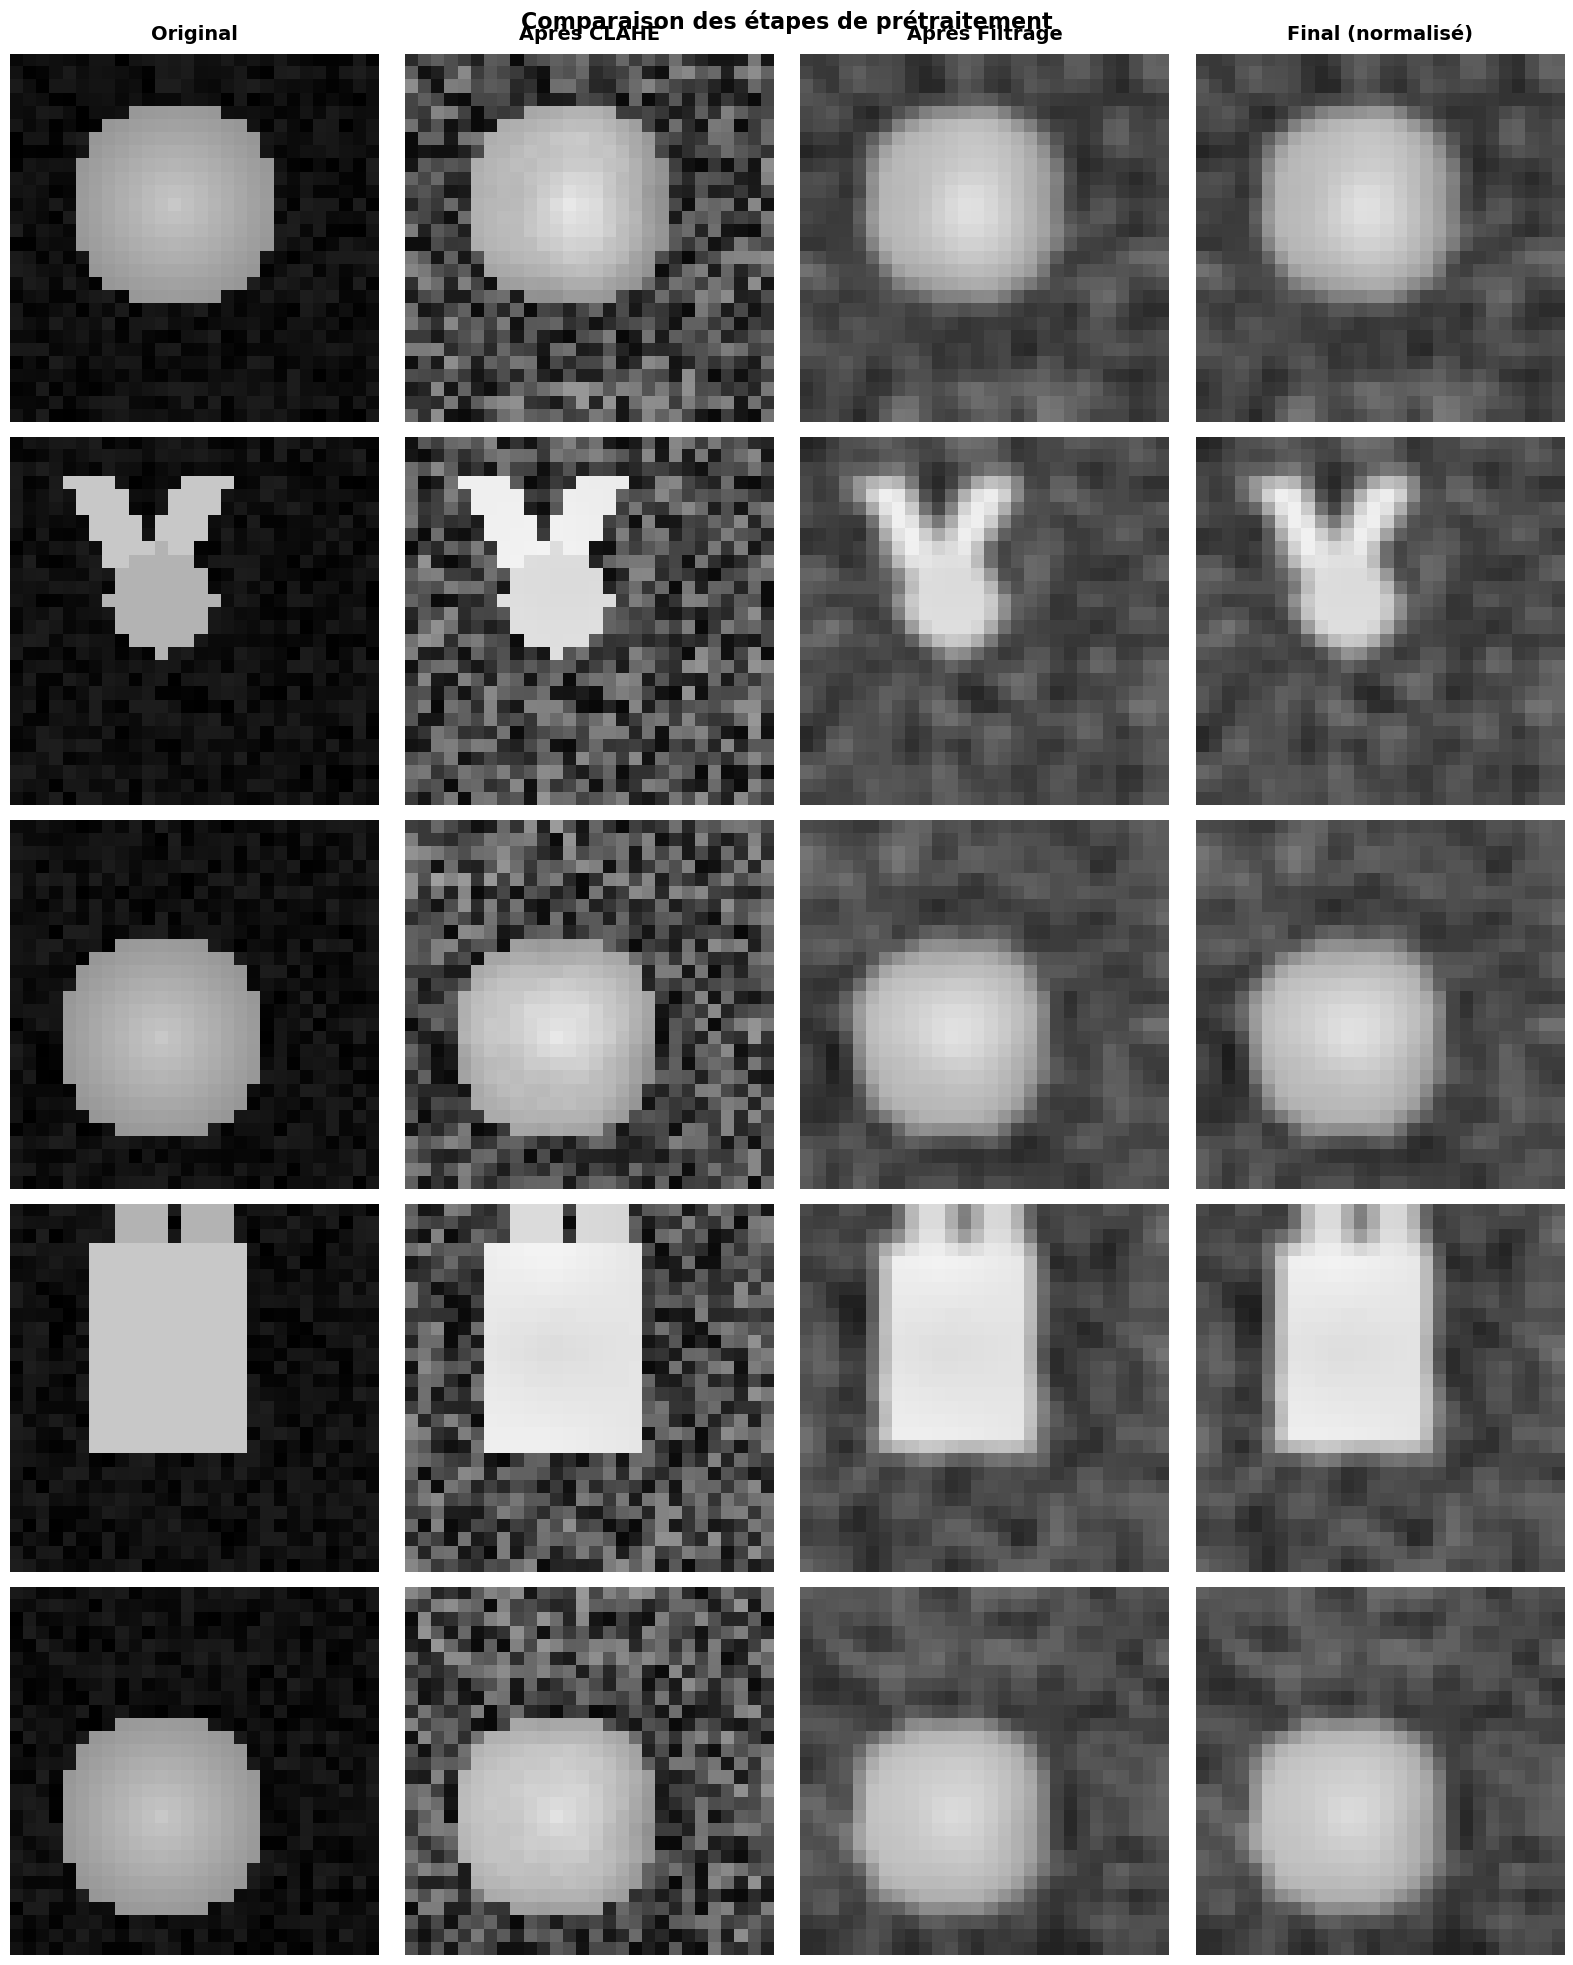


✅ Comparaison sauvegardée : results/plots/comparaison_preprocessing.png

💡 Observations :
   - CLAHE améliore le contraste (zones sombres deviennent visibles)
   - Filtrage gaussien lisse l'image (réduit le bruit)
   - Normalisation ramène les valeurs entre 0 et 1


In [3]:
# =============================================================================
# VISUALISATION : Comparaison avant/après prétraitement
# =============================================================================

print("\n" + "="*70)
print("🔍 COMPARAISON AVANT/APRÈS PRÉTRAITEMENT")
print("="*70)

# Sélectionner 5 exemples aléatoires
np.random.seed(42)
indices_exemples = np.random.choice(len(X_train_raw), 5, replace=False)

fig, axes = plt.subplots(5, 4, figsize=(16, 20))
fig.suptitle('Comparaison des étapes de prétraitement', fontsize=16, fontweight='bold')

# Titres des colonnes
titres_colonnes = ['Original', 'Après CLAHE', 'Après Filtrage', 'Final (normalisé)']
for col, titre in enumerate(titres_colonnes):
    axes[0, col].set_title(titre, fontsize=14, fontweight='bold', pad=10)

for idx_row, idx_img in enumerate(indices_exemples):
    image_originale = X_train_raw[idx_img].reshape(28, 28).astype(np.uint8)
    
    # Colonne 1 : Original
    axes[idx_row, 0].imshow(image_originale, cmap='gray', vmin=0, vmax=255)
    axes[idx_row, 0].axis('off')
    axes[idx_row, 0].set_ylabel(f'Exemple {idx_row+1}\nClasse {y_train[idx_img]}', 
                                fontsize=11, fontweight='bold')
    
    # Colonne 2 : Après CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4, 4))
    image_clahe = clahe.apply(image_originale)
    axes[idx_row, 1].imshow(image_clahe, cmap='gray', vmin=0, vmax=255)
    axes[idx_row, 1].axis('off')
    
    # Colonne 3 : Après Filtrage
    image_filtree = cv2.GaussianBlur(image_clahe, (3, 3), 0)
    axes[idx_row, 2].imshow(image_filtree, cmap='gray', vmin=0, vmax=255)
    axes[idx_row, 2].axis('off')
    
    # Colonne 4 : Final (normalisé)
    image_finale = image_filtree.astype(np.float32) / 255.0
    axes[idx_row, 3].imshow(image_finale, cmap='gray', vmin=0, vmax=1)
    axes[idx_row, 3].axis('off')

plt.tight_layout()
plt.savefig('results/plots/comparaison_preprocessing.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n✅ Comparaison sauvegardée : results/plots/comparaison_preprocessing.png")

print(f"\n💡 Observations :")
print(f"   - CLAHE améliore le contraste (zones sombres deviennent visibles)")
print(f"   - Filtrage gaussien lisse l'image (réduit le bruit)")
print(f"   - Normalisation ramène les valeurs entre 0 et 1")

In [4]:
# =============================================================================
# PRÉTRAITEMENT DU DATASET COMPLET
# =============================================================================

print("\n" + "="*70)
print("⚙️ PRÉTRAITEMENT DU DATASET COMPLET")
print("="*70)

def pretraiter_dataset(X_raw, nom_dataset="Dataset"):
    """
    Prétraite un dataset complet avec barre de progression
    
    Paramètres :
    -----------
    X_raw : array (n_images, 784)
        Dataset brut
    nom_dataset : str
        Nom du dataset (pour affichage)
    
    Retourne :
    ---------
    X_processed : array (n_images, 784)
        Dataset prétraité
    """
    n_images = len(X_raw)
    X_processed = np.zeros_like(X_raw, dtype=np.float32)
    
    print(f"\n⏳ Prétraitement de {nom_dataset} ({n_images} images)...")
    
    # Utiliser tqdm pour la barre de progression
    for i in tqdm(range(n_images), desc=f"   Traitement"):
        X_processed[i] = pretraiter_image(X_raw[i])
    
    return X_processed


# Prétraiter le dataset d'entraînement
X_train_processed = pretraiter_dataset(X_train_raw, "Train set")

print(f"\n✅ Dataset train prétraité")
print(f"   - Shape : {X_train_processed.shape}")
print(f"   - Type  : {X_train_processed.dtype}")
print(f"   - Min/Max : {X_train_processed.min():.4f} / {X_train_processed.max():.4f}")
print(f"   - Moyenne : {X_train_processed.mean():.4f}")

# Prétraiter le dataset de test
X_test_processed = pretraiter_dataset(X_test_raw, "Test set")

print(f"\n✅ Dataset test prétraité")
print(f"   - Shape : {X_test_processed.shape}")
print(f"   - Type  : {X_test_processed.dtype}")
print(f"   - Min/Max : {X_test_processed.min():.4f} / {X_test_processed.max():.4f}")
print(f"   - Moyenne : {X_test_processed.mean():.4f}")


⚙️ PRÉTRAITEMENT DU DATASET COMPLET

⏳ Prétraitement de Train set (900 images)...


   Traitement: 100%|██████████| 900/900 [00:00<00:00, 20626.37it/s]



✅ Dataset train prétraité
   - Shape : (900, 784)
   - Type  : float32
   - Min/Max : 0.0627 / 0.9569
   - Moyenne : 0.3898

⏳ Prétraitement de Test set (300 images)...


   Traitement: 100%|██████████| 300/300 [00:00<00:00, 20348.85it/s]


✅ Dataset test prétraité
   - Shape : (300, 784)
   - Type  : float32
   - Min/Max : 0.0784 / 0.9529
   - Moyenne : 0.3893


In [5]:
# =============================================================================
# RESHAPE POUR CNN ET SAUVEGARDE
# =============================================================================

print("\n" + "="*70)
print("🔄 RESHAPE POUR RÉSEAU DE NEURONES CONVOLUTIF (CNN)")
print("="*70)

# Les CNN attendent des images au format (n_images, hauteur, largeur, channels)
# Pour des images en niveaux de gris : (n_images, 28, 28, 1)

print(f"\n📐 Reshape des données...")

# Reshape train
X_train_cnn = X_train_processed.reshape(-1, 28, 28, 1)
print(f"✅ X_train : {X_train_processed.shape} → {X_train_cnn.shape}")

# Reshape test
X_test_cnn = X_test_processed.reshape(-1, 28, 28, 1)
print(f"✅ X_test  : {X_test_processed.shape} → {X_test_cnn.shape}")

print(f"\n💡 Format CNN :")
print(f"   - Dimension 0 : nombre d'images")
print(f"   - Dimension 1 : hauteur (28 pixels)")
print(f"   - Dimension 2 : largeur (28 pixels)")
print(f"   - Dimension 3 : canaux (1 = niveaux de gris)")

# =============================================================================
# SAUVEGARDE DES DONNÉES PRÉTRAITÉES
# =============================================================================

print(f"\n" + "="*70)
print("💾 SAUVEGARDE DES DONNÉES PRÉTRAITÉES")
print("="*70)

# Créer le dossier si nécessaire
os.makedirs('data/processed', exist_ok=True)

# Fichiers à sauvegarder
fichiers_sortie = {
    'data/processed/X_train.npy': X_train_cnn,
    'data/processed/X_test.npy': X_test_cnn,
    'data/processed/y_train.npy': y_train,
    'data/processed/y_test.npy': y_test
}

print(f"\n💾 Sauvegarde en cours...\n")

for chemin, donnees in fichiers_sortie.items():
    np.save(chemin, donnees)
    taille_mb = os.path.getsize(chemin) / (1024 * 1024)
    print(f"✅ {chemin}")
    print(f"   Shape : {donnees.shape}")
    print(f"   Type  : {donnees.dtype}")
    print(f"   Taille : {taille_mb:.2f} MB\n")

print("="*70)
print("🎉 PRÉTRAITEMENT TERMINÉ ET SAUVEGARDÉ AVEC SUCCÈS")
print("="*70)


🔄 RESHAPE POUR RÉSEAU DE NEURONES CONVOLUTIF (CNN)

📐 Reshape des données...
✅ X_train : (900, 784) → (900, 28, 28, 1)
✅ X_test  : (300, 784) → (300, 28, 28, 1)

💡 Format CNN :
   - Dimension 0 : nombre d'images
   - Dimension 1 : hauteur (28 pixels)
   - Dimension 2 : largeur (28 pixels)
   - Dimension 3 : canaux (1 = niveaux de gris)

💾 SAUVEGARDE DES DONNÉES PRÉTRAITÉES

💾 Sauvegarde en cours...

✅ data/processed/X_train.npy
   Shape : (900, 28, 28, 1)
   Type  : float32
   Taille : 2.69 MB

✅ data/processed/X_test.npy
   Shape : (300, 28, 28, 1)
   Type  : float32
   Taille : 0.90 MB

✅ data/processed/y_train.npy
   Shape : (900,)
   Type  : int64
   Taille : 0.01 MB

✅ data/processed/y_test.npy
   Shape : (300,)
   Type  : int64
   Taille : 0.00 MB

🎉 PRÉTRAITEMENT TERMINÉ ET SAUVEGARDÉ AVEC SUCCÈS


In [6]:
# =============================================================================
# VÉRIFICATION DE LA SAUVEGARDE
# =============================================================================

print("\n" + "="*70)
print("🔍 VÉRIFICATION DE LA SAUVEGARDE")
print("="*70)

# Tester le chargement
print(f"\n⏳ Test de chargement des fichiers .npy...\n")

try:
    X_train_loaded = np.load('data/processed/X_train.npy')
    X_test_loaded = np.load('data/processed/X_test.npy')
    y_train_loaded = np.load('data/processed/y_train.npy')
    y_test_loaded = np.load('data/processed/y_test.npy')
    
    print("✅ Tous les fichiers chargés avec succès\n")
    
    # Vérifier l'intégrité
    print("🔍 Vérification de l'intégrité :")
    
    assert X_train_loaded.shape == X_train_cnn.shape, "Shape X_train incorrect"
    assert X_test_loaded.shape == X_test_cnn.shape, "Shape X_test incorrect"
    assert y_train_loaded.shape == y_train.shape, "Shape y_train incorrect"
    assert y_test_loaded.shape == y_test.shape, "Shape y_test incorrect"
    
    print("✅ Toutes les shapes sont correctes")
    
    # Vérifier que les données sont identiques
    assert np.allclose(X_train_loaded, X_train_cnn), "Données X_train différentes"
    assert np.allclose(X_test_loaded, X_test_cnn), "Données X_test différentes"
    assert np.array_equal(y_train_loaded, y_train), "Labels y_train différents"
    assert np.array_equal(y_test_loaded, y_test), "Labels y_test différents"
    
    print("✅ Les données sont identiques à celles en mémoire")
    
    print(f"\n" + "="*70)
    print("✅ VÉRIFICATION RÉUSSIE - FICHIERS PRÊTS POUR L'ENTRAÎNEMENT")
    print("="*70)
    
except Exception as e:
    print(f"❌ ERREUR : {e}")


🔍 VÉRIFICATION DE LA SAUVEGARDE

⏳ Test de chargement des fichiers .npy...

✅ Tous les fichiers chargés avec succès

🔍 Vérification de l'intégrité :
✅ Toutes les shapes sont correctes
✅ Les données sont identiques à celles en mémoire

✅ VÉRIFICATION RÉUSSIE - FICHIERS PRÊTS POUR L'ENTRAÎNEMENT



📊 COMPARAISON STATISTIQUE AVANT/APRÈS

Statistique          Avant           Après           Changement
-----------------------------------------------------------------
Min                  0.0000          0.0627          0.0627 (normalisé)
Max                  200.0000        0.9569          0.9569 (normalisé)
Moyenne              48.0159         0.3898          -99.19%
Écart-type           68.3656         0.2049          -99.70%


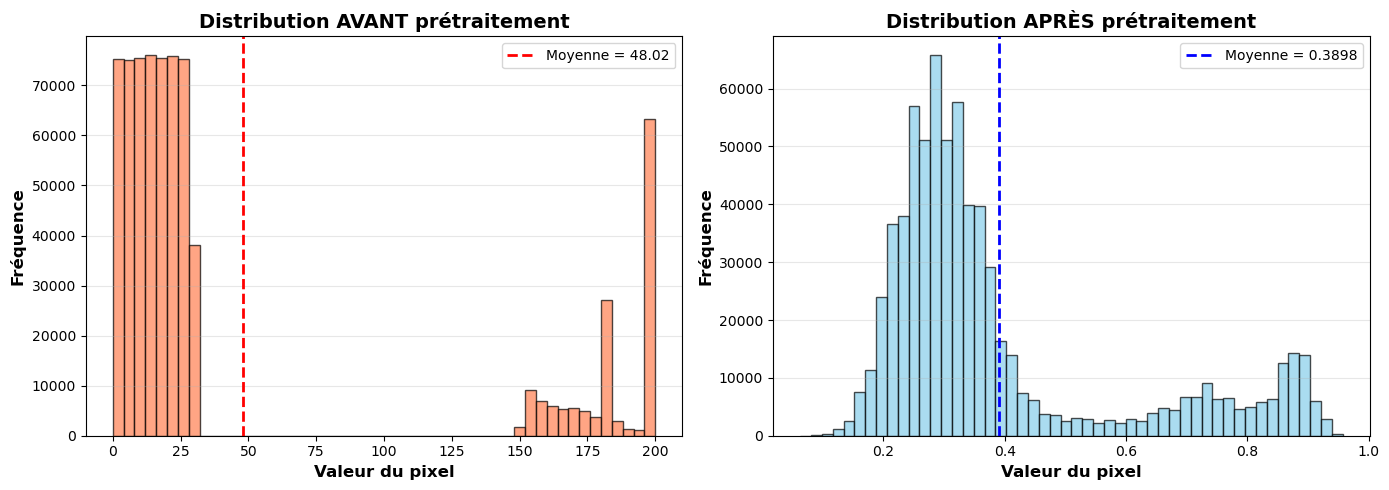


✅ Comparaison sauvegardée : results/plots/stats_avant_apres_preprocessing.png


In [7]:
# =============================================================================
# STATISTIQUES : Comparaison avant/après prétraitement
# =============================================================================

print("\n" + "="*70)
print("📊 COMPARAISON STATISTIQUE AVANT/APRÈS")
print("="*70)

# Calculer les statistiques
stats = {
    'Avant prétraitement': {
        'Min': X_train_raw.min(),
        'Max': X_train_raw.max(),
        'Moyenne': X_train_raw.mean(),
        'Écart-type': X_train_raw.std()
    },
    'Après prétraitement': {
        'Min': X_train_cnn.min(),
        'Max': X_train_cnn.max(),
        'Moyenne': X_train_cnn.mean(),
        'Écart-type': X_train_cnn.std()
    }
}

# Afficher sous forme de tableau
print(f"\n{'Statistique':<20} {'Avant':<15} {'Après':<15} {'Changement'}")
print("-" * 65)

for stat_nom in ['Min', 'Max', 'Moyenne', 'Écart-type']:
    avant = stats['Avant prétraitement'][stat_nom]
    apres = stats['Après prétraitement'][stat_nom]
    
    if stat_nom in ['Min', 'Max']:
        changement = f"{apres:.4f} (normalisé)"
    else:
        pourcentage = ((apres - avant) / avant * 100) if avant != 0 else 0
        changement = f"{pourcentage:+.2f}%"
    
    print(f"{stat_nom:<20} {avant:<15.4f} {apres:<15.4f} {changement}")

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogramme avant
axes[0].hist(X_train_raw.flatten(), bins=50, color='coral', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Valeur du pixel', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Fréquence', fontsize=12, fontweight='bold')
axes[0].set_title('Distribution AVANT prétraitement', fontsize=14, fontweight='bold')
axes[0].axvline(X_train_raw.mean(), color='red', linestyle='--', linewidth=2, label=f'Moyenne = {X_train_raw.mean():.2f}')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Histogramme après
axes[1].hist(X_train_cnn.flatten(), bins=50, color='skyblue', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Valeur du pixel', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Fréquence', fontsize=12, fontweight='bold')
axes[1].set_title('Distribution APRÈS prétraitement', fontsize=14, fontweight='bold')
axes[1].axvline(X_train_cnn.mean(), color='blue', linestyle='--', linewidth=2, label=f'Moyenne = {X_train_cnn.mean():.4f}')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('results/plots/stats_avant_apres_preprocessing.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n✅ Comparaison sauvegardée : results/plots/stats_avant_apres_preprocessing.png")

In [9]:
# =============================================================================
# RÉSUMÉ FINAL DU PRÉTRAITEMENT
# =============================================================================

print("\n" + "="*70)
print("📋 RÉSUMÉ FINAL DU PRÉTRAITEMENT")
print("="*70)

print(f"\n✅ Techniques appliquées :")
print(f"   1. CLAHE (Contrast Limited Adaptive Histogram Equalization)")
print(f"      → Améliore le contraste localement")
print(f"   2. Filtrage Gaussien (noyau 3×3)")
print(f"      → Réduit le bruit")
print(f"   3. Normalisation [0, 1]")
print(f"      → Facilite l'apprentissage")

print(f"\n✅ Fichiers créés dans data/processed/ :")
fichiers_crees = [
    ('X_train.npy', X_train_cnn.shape, X_train_cnn.dtype),
    ('X_test.npy', X_test_cnn.shape, X_test_cnn.dtype),
    ('y_train.npy', y_train.shape, y_train.dtype),
    ('y_test.npy', y_test.shape, y_test.dtype)
]

for nom, shape, dtype in fichiers_crees:
    chemin = f'data/processed/{nom}'
    taille_mb = os.path.getsize(chemin) / (1024 * 1024)
    # ✅ CORRECTION : Convertir dtype en string
    print(f"   📄 {nom:<15} Shape: {str(shape):<20} Type: {str(dtype):<15} Taille: {taille_mb:.2f} MB")

print(f"\n✅ Visualisations créées :")
visualisations = [
    'results/plots/comparaison_preprocessing.png',
    'results/plots/stats_avant_apres_preprocessing.png'
]

for viz in visualisations:
    if os.path.exists(viz):
        print(f"   ✅ {viz}")
    else:
        print(f"   ❌ {viz} manquant")

print(f"\n" + "="*70)
print("🎉 PRÉTRAITEMENT TERMINÉ AVEC SUCCÈS")
print("="*70)

print(f"\n➡️ Prochaine étape : 04_build_model.ipynb")
print(f"   Nous allons construire un réseau de neurones convolutif (CNN)")
print(f"   pour classifier les gestes de la main.")

print(f"\n💡 Les données prétraitées sont maintenant prêtes pour l'entraînement !")
print(f"   Format optimal pour CNN : (n_images, 28, 28, 1)")
print(f"   Valeurs normalisées : [0, 1]")


📋 RÉSUMÉ FINAL DU PRÉTRAITEMENT

✅ Techniques appliquées :
   1. CLAHE (Contrast Limited Adaptive Histogram Equalization)
      → Améliore le contraste localement
   2. Filtrage Gaussien (noyau 3×3)
      → Réduit le bruit
   3. Normalisation [0, 1]
      → Facilite l'apprentissage

✅ Fichiers créés dans data/processed/ :
   📄 X_train.npy     Shape: (900, 28, 28, 1)     Type: float32         Taille: 2.69 MB
   📄 X_test.npy      Shape: (300, 28, 28, 1)     Type: float32         Taille: 0.90 MB
   📄 y_train.npy     Shape: (900,)               Type: int64           Taille: 0.01 MB
   📄 y_test.npy      Shape: (300,)               Type: int64           Taille: 0.00 MB

✅ Visualisations créées :
   ✅ results/plots/comparaison_preprocessing.png
   ✅ results/plots/stats_avant_apres_preprocessing.png

🎉 PRÉTRAITEMENT TERMINÉ AVEC SUCCÈS

➡️ Prochaine étape : 04_build_model.ipynb
   Nous allons construire un réseau de neurones convolutif (CNN)
   pour classifier les gestes de la main.

💡 Les do